# 2. Seq2seq ("Sequence to sequence") 모델

### 세상에는 많은 시계열 데이터(Sequence Data)가 존재.
### 텍스트, 음성, 영상 등 많은 종류의 시계열 데이터가 존재하고, 이러한 시계열 데이터들을 다른 시계열 데이터로 변환하는 문제들도 숱하게 생각할 수 있다.
### 예를 들어, 기계 번역이나 음성인식을 예로 들 수 있다. ( Neural Machine Translation or Speech Recognition) 
### 이러한 문제를 위한 모델로 2개의 RNN을 이용하는 Seq2seq라는 모델이 있다.

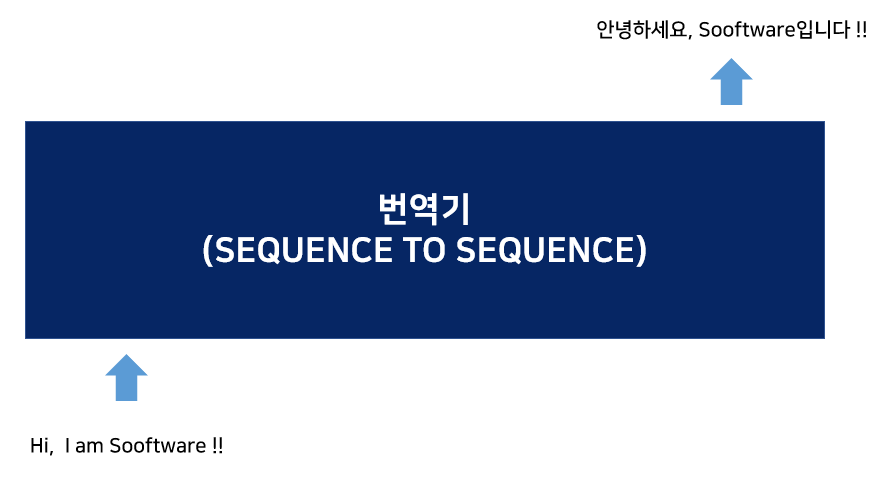

## 2-1. Seq2seq의 원리

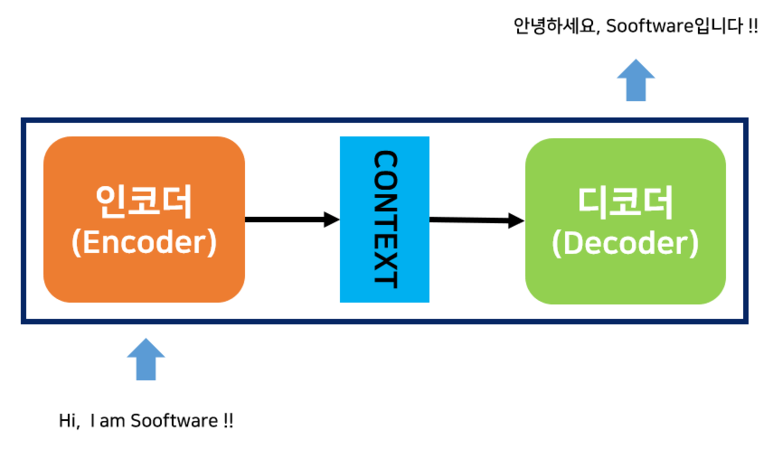

# 2-1-1. Encoder - Decoder (인코더- 디코더)

### - Seq2seq를 Encoder-Decoder 모델이라고도 많이들 부른다.
### - 이름이 말해주듯이 2개의 모듈, Encoder와 Decoder가 등장.
### - Encoder는 입력 데이터를 인코딩하고, Decoder는 인코딩된 데이터를 디코딩하는 역할을 한다.
### - "Encoder는 어떤 시계열 데이터를 압축해서 표현해주고 Decoder는 압축된 데이터를 다른 시계열 데이터로 변환해준다."


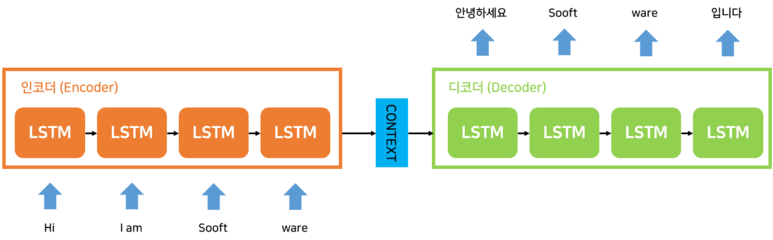

### 인코더는 데이터를 입력받아서 하나의 벡터로 정보를 압축한다.
### 이 때의 벡터를 컨텍스트 벡터(Context Vector)라고 하며 디코더는 이 컨텍스트 벡터를 이용해서 위의 그림과 같은 번역을 수행하는 것이다.


# 2-1-2. Decoder
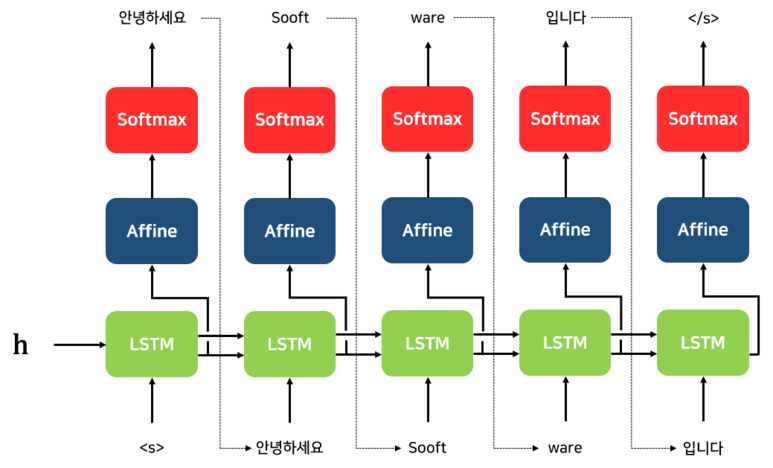
### Decoder는 기본적으로 RNNLM (RNN Language Model)이다.
### Decoder는 Encoder로부터 Context Vector (h)를 넘겨 받는다.
### 그리고 첫 입력으로 문장의 시작을 의미하는 심볼인 < s >가 들어간다. (< s >는 < sos >, < bos >, < Go > 등 많은 이름으로 불린다.)

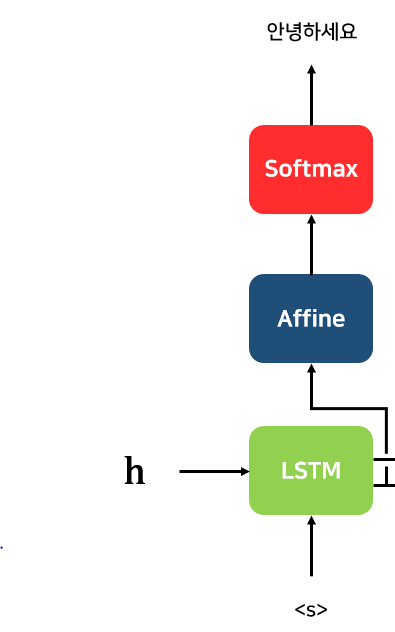

### Decoder의 첫 번째 RNN 셀은 Context Vector와 < s >, 이 2개의 입력을 바탕으로 새로운 Hidden State를 계산하고 이를 Affine 계층과 Softmax 계층을 거쳐서 다음에 등장할 확률이 높은 "안녕하세요"를 예측한다.
### (Affine 계층은 Hidden State를 입력으로 받아 분류 개수로 출력해주는 피드포워드 네트워크이다.)

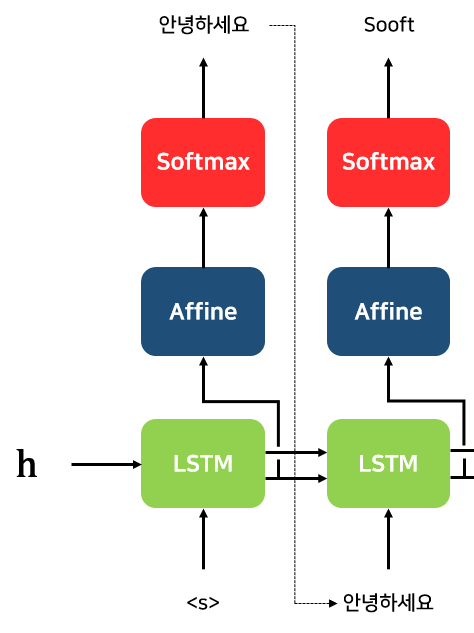

#### 그리고 계산한 새로운 Hidden State와 예측한 "안녕하세요"를 입력으로 해서 2번째 예측을 수행한다.
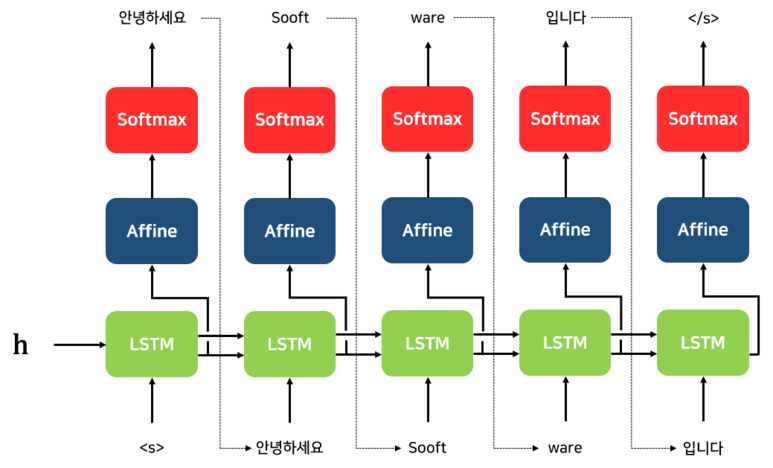

### 위의 과정을 문장의 끝을 의미하는 심볼인 < /s >가 다음 단어로 예측 될 때까지 반복한다. (< /s >는 < eos >, < end > 등 많은 이름으로 불린다.)

# 2-1-3. Decoder와 RNNLM
### 여기서 디코더와 RNNLM (RNN Language Model) 즉, RNN을 이용해서 문장을 생성하는 모델과의 유일한 차이점은 인코더에서 만든 Context Vector를 입력받는다는 점만이 다르다.
### 컨텍스트 벡터를 초기 입력으로 받는다는 사소한 차이점이 평범한 언어 모델도 기계 번역, 음성 인식과 같은 복잡한 문제도 풀 수 있는 Decoder로 탈바꿈 시킬 수 있다.
## Seqseq의 전체 모습
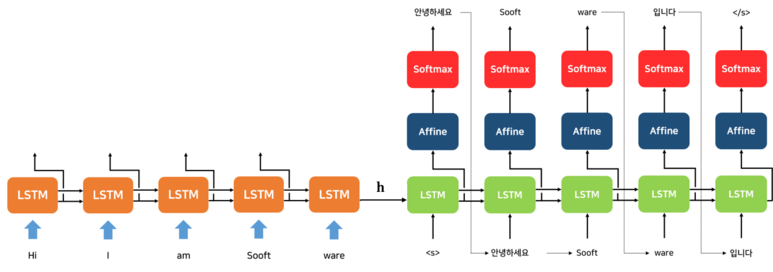
### Encoder와 Decoder를 연결한 Seq2seq의 전체 그림이다.
### 그림에서 볼 수 있듯이, Encoder의 마지막 Hidden State가 Encoder와 Decoder의 순전파와 역전파를 이어주는 다리가 된다.

# 2-1-4. Seq2Seq 개선
### 효과적인 기법이 몇 가지 존재.
# <입력 데이터 반전 (Reverse)>
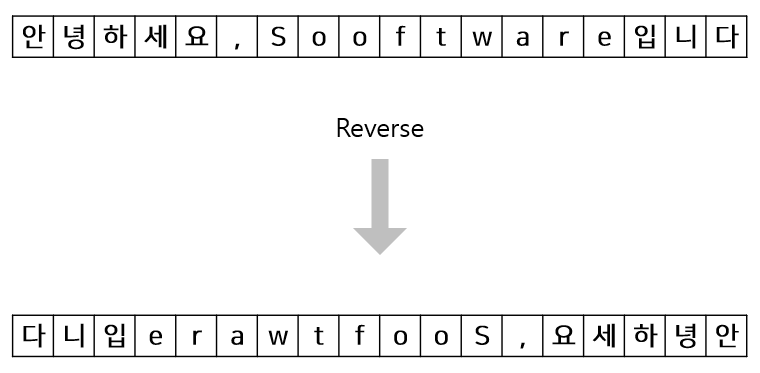
### - 첫 번째 개선안은 아주 손 쉬운 방법이다.
### - 위 그림에서 보듯이 입력 데이터의 순서를 반전시키는 것이다.이 트릭을 사용하면 많은 경우 학습이 빨라져서, 최종 정확도도 좋아진다고 한다.
### - 이 트릭을 사용하면 많은 경우 학습이 빨라져서, 최종 정확도도 좋아진다고 한다.
### - 그렇다면 왜 입력 데이터를 반전시키는 것만으로 학습이 빨라지고 정확도가 향상되는 걸까? 직관적으로는 Gradient의 전파가 원할해지기 때문이라고 볼 수 있다.

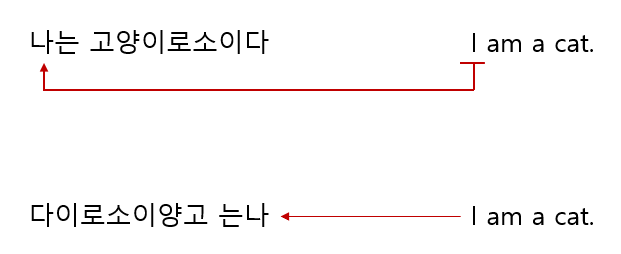

### - 예를 들어 "나는 고양이로소이다"를 "I am a cat"으로 번역하는 문제에서, "나"라는 단어가 "I"까지 가는 것보다 데이터를 반전시켰을 때 Gradient 전파가 잘 될 것이다.
### - 물론 평균적인 거리는 그대로이지만, 시계열 데이터는 관련 문제에서는 앞쪽 데이터에 대한 정확한 예측이 선행되면 뒤에 예측에서도 좋은 결과로 이어지는 경우가 많기 때문에 더 좋은 결과가 나오지 않을까 싶다.

# < Peeky Seq2seq >
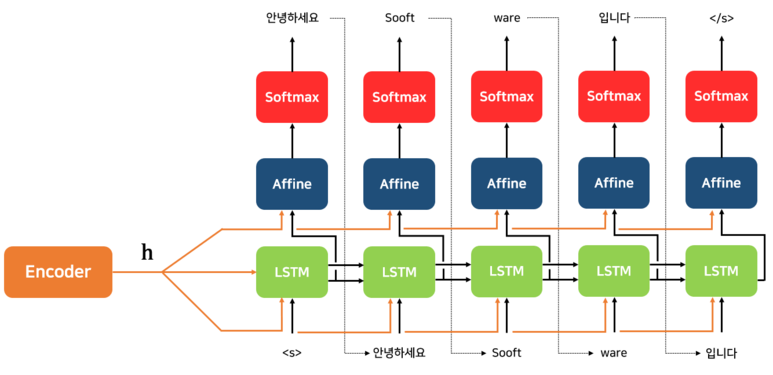
### - seq2seq 두 번째 개선안이다.
### - 앞서 배운 seq2seq의 동작을 다시 한 번 살펴보게 되면, Enocoder는 입력 데이터를 고정 길이의 컨텍스트 벡터로 변환한다.
### - Decoder 입장에서는 이 컨벡스트 벡터만이 예측을 하는데에 제공되는 유일한 정보인 셈이다.
### - 그러나 이 중요한 정보를 기본 Seq2seq에서는 최초 RNN 셀에만 전달이 된다.
### - 이러한 점을 수정해서 중요한 정보가 담긴 컨벡스트 벡터를 디코더의 다른 계층들에게도 전달해주는 것이다.
### - Peeky Seq2seq는 기본 Seq2seq에 비해 꽤나 더 좋은 성능을 보인다고 알려져있다.
### - 하지만 Peeky Seq2seq는 기본 Seq2seq에 비해 파라미터가 더 늘어나기 때문에 계산량 역시 늘어나게 된다.
### - 그리고 Seq2seq의 정확도는 하이퍼파라미터에 영향을 크게 받으므로, 실제 문제에서는 어떤 성능을 낼지 미지수이다.

# 2-1-5. 다양한 seq2seq
### - Seq2seq는 단순한 구조에 비해 강력한 성능을 보여준다.
### - 그렇기 때문에 위에서 살펴본 기본적인 Seq2seq 구조 외에도 다양하게 변형된 Seq2seq가 존재한다.
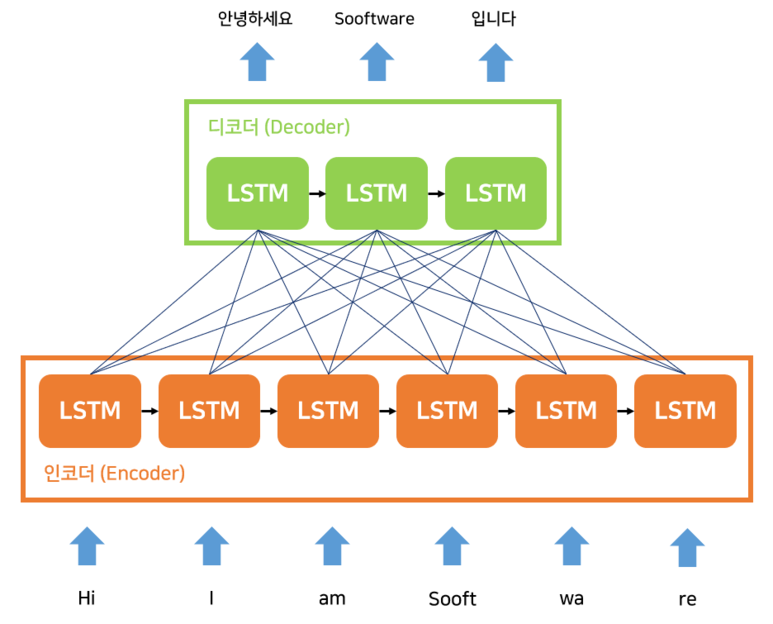
( 중간에 Fully-Connected Layer를 둔 Seq2seq )
### - 단순히 마지막 RNN 셀의 Hidden State만을 넘겨주는 방법이 아닌, Encoder와 Decoder 사이에 Fully-Connected Layer를 둔 모델도 있다.


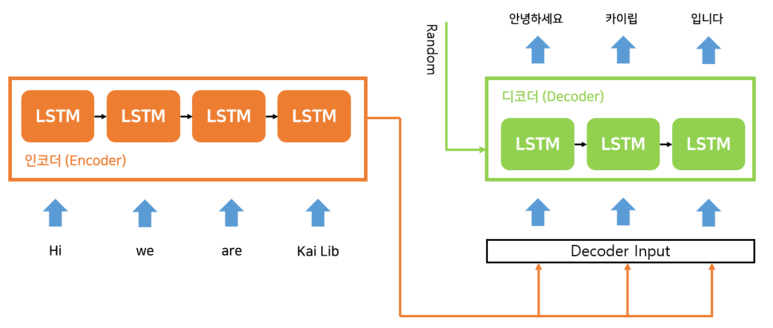
(Encoder의 출력을 Decoder의 입력에 추가하는 Seq2seq)
### - 인코더가 만든 Context Vector를 모든 디코더의 입력에 concatenate하는 방식의 모델도 있다.

# 2-1-6. Seq2seq의 한계.
### - 하지만 이러한 기보적인 Seq2seq에는 한계점이 존재한다.
### - 입력 데이터가 길어지게 되면 성능이 확연하게 떨어진다는 것이다.
### - 이러한 Seq2seq의 한계를 극복하기 위해 제안된 Attention Mechanism이 있다.
(Attention Mechanism : https://blog.naver.com/sooftware/221784472231 )

출처 : https://blog.naver.com/sooftware/221784419691